In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as BS
import numpy as np
import re
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
import urllib.robotparser as urobot
from urllib.request import urlopen
from pylab import rcParams
import csv
import math

%matplotlib inline

In [2]:
#Load both list_of_champs tables (current and former champs) & prospects'

df1 = pd.read_csv('../data/list_of_champs.csv')
df2 = pd.read_csv('../data/Top50_prospects.csv')
df2 = df2.dropna(axis=1)
df2

,Rank,Name,Weight Class,Record,Age,Fighting Style,Company,Country,Nickname,Title Holder,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision
0,1,Vadim Nemkov,Light Heavyweight,12-2,27,Wrestling,Bellator,Russia,Unknown,Prospect,9,2,1,1,0,1
1,2,Lance Palmer,Featherweight,22-3,32,Wrestling,PFL,USA,The Party,Prospect,1,8,13,0,1,2
2,3,A.J. McKee,Featherweight,17-0,25,Wrestling,Bellator,USA,Mercenary,Prospect,6,6,5,0,0,0
3,4,Natan Schulte,Lightweight,20-3-1,28,Jiu-Jitsu,PFL,Brazil,Russo,Prospect,4,9,7,1,1,1
4,5,Darrion Caldwell,Featherweight,15-4,32,Wrestling,Bellator,USA,The Wolf,Prospect,2,6,7,0,3,1
5,6,Jiri Prochazka,Light Heavyweight,27-3-1,27,Boxing,UFC,Czech republic,Denisa,Prospect,24,2,1,2,1,0
6,7,Valentin Moldavsky,Heavyweight,10-1,28,"Sambo, MMA",Bellator,Russia,Unknown,Prospect,1,3,6,0,0,1
7,8,Abdul-Aziz Abdulvakhabov,Lightweight,18-2,31,Wrestling,ACA,Russia,Lion,Prospect,7,6,5,0,0,2
8,9,Tomasz Narkun,Light Heavyweight,18-3,30,Jiu-Jitsu,KSW,Poland,Giraffe,Prospect,3,14,1,1,0,2
9,10,Pedro Carvalho,Featherweight,11-4,24,Jiu-Jitsu,Bellator,Portugal,The Game,Prospect,2,6,3,1,1,2


In [3]:
df2.dtypes

Rank                   int64
 Name                 object
 Weight Class         object
 Record               object
Age                    int64
Fighting Style        object
Company               object
Country               object
Nickname              object
Title Holder          object
win_by_KO_TKO          int64
win_by_submission      int64
win_by_decision        int64
loss_by_KO_TKO         int64
loss_by_submission     int64
loss_by_decision       int64
dtype: object

In [4]:
###Adjust df2 to match up with the list of champs before joining both tables###

df2 = pd.read_csv('../data/Top50_prospects.csv', usecols = [' Weight Class',
                                                            ' Name',
                                                            ' Record',
                                                            'Fighting Style',
                                                            'Country',
                                                            'Nickname',
                                                            'Title Holder',
                                                            'win_by_KO_TKO', 
                                                            'win_by_submission', 
                                                            'win_by_decision', 
                                                            'loss_by_KO_TKO', 
                                                            'loss_by_submission', 
                                                            'loss_by_decision'])

df2

,Name,Weight Class,Record,Fighting Style,Country,Nickname,Title Holder,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision
0,Vadim Nemkov,Light Heavyweight,12-2,Wrestling,Russia,Unknown,Prospect,9,2,1,1,0,1
1,Lance Palmer,Featherweight,22-3,Wrestling,USA,The Party,Prospect,1,8,13,0,1,2
2,A.J. McKee,Featherweight,17-0,Wrestling,USA,Mercenary,Prospect,6,6,5,0,0,0
3,Natan Schulte,Lightweight,20-3-1,Jiu-Jitsu,Brazil,Russo,Prospect,4,9,7,1,1,1
4,Darrion Caldwell,Featherweight,15-4,Wrestling,USA,The Wolf,Prospect,2,6,7,0,3,1
5,Jiri Prochazka,Light Heavyweight,27-3-1,Boxing,Czech republic,Denisa,Prospect,24,2,1,2,1,0
6,Valentin Moldavsky,Heavyweight,10-1,"Sambo, MMA",Russia,Unknown,Prospect,1,3,6,0,0,1
7,Abdul-Aziz Abdulvakhabov,Lightweight,18-2,Wrestling,Russia,Lion,Prospect,7,6,5,0,0,2
8,Tomasz Narkun,Light Heavyweight,18-3,Jiu-Jitsu,Poland,Giraffe,Prospect,3,14,1,1,0,2
9,Pedro Carvalho,Featherweight,11-4,Jiu-Jitsu,Portugal,The Game,Prospect,2,6,3,1,1,2


In [5]:
## Since df2 only showcases the top50 'MALE' MMA prospects, let's add a 'Gender' colummn to differenciate our Males and females athletes.

df2['Sex'] = 'Male'
df2

,Name,Weight Class,Record,Fighting Style,Country,Nickname,Title Holder,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision,Sex
0,Vadim Nemkov,Light Heavyweight,12-2,Wrestling,Russia,Unknown,Prospect,9,2,1,1,0,1,Male
1,Lance Palmer,Featherweight,22-3,Wrestling,USA,The Party,Prospect,1,8,13,0,1,2,Male
2,A.J. McKee,Featherweight,17-0,Wrestling,USA,Mercenary,Prospect,6,6,5,0,0,0,Male
3,Natan Schulte,Lightweight,20-3-1,Jiu-Jitsu,Brazil,Russo,Prospect,4,9,7,1,1,1,Male
4,Darrion Caldwell,Featherweight,15-4,Wrestling,USA,The Wolf,Prospect,2,6,7,0,3,1,Male
5,Jiri Prochazka,Light Heavyweight,27-3-1,Boxing,Czech republic,Denisa,Prospect,24,2,1,2,1,0,Male
6,Valentin Moldavsky,Heavyweight,10-1,"Sambo, MMA",Russia,Unknown,Prospect,1,3,6,0,0,1,Male
7,Abdul-Aziz Abdulvakhabov,Lightweight,18-2,Wrestling,Russia,Lion,Prospect,7,6,5,0,0,2,Male
8,Tomasz Narkun,Light Heavyweight,18-3,Jiu-Jitsu,Poland,Giraffe,Prospect,3,14,1,1,0,2,Male
9,Pedro Carvalho,Featherweight,11-4,Jiu-Jitsu,Portugal,The Game,Prospect,2,6,3,1,1,2,Male


#let's merge the champions' list with the prospects'

In [6]:
group = (df1,df2)
df3 = pd.concat(group, ignore_index = True)
df3

##df3 = pd.merge(df1, df2, how = 'outer')
##df3

,Weight Class,Name,Sex,Record,Fighting Style,Country,Nickname,Title Holder,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision
0,Heavyweight\n,Mark Coleman\n,Male,16-10,Wrestling,USA,The Hammer,Former,7,5,4,3,5,2
1,Heavyweight\n,Maurice Smith\n,Male,14-14,Kickboxing,USA,Mo,Former,8,3,3,0,8,6
2,Heavyweight\n,Randy Couture\n,Male,19-11,Wrestling,USA,The Natural,Former,7,4,8,7,3,1
3,Heavyweight\n,Bas Rutten\n,Male,28-4,"Kickboxing, Wrestling",Netherlands,El Guapo (The Handsome One),Former,12,13,3,0,3,1
4,Heavyweight\n,Kevin Randleman\n,Male,17-16,"Wrestling, Boxing",USA,The Monster,Former,9,8,0,4,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Light Heavyweight,Nasrudin Nasrudinov,Male,9-0,Wrestling,Russia,Unknown,Prospect,4,1,4,0,0,0
165,Middleweight,Vladimir Mineev,Male,14-1-1,Kickboxing,Russia,Unknown,Prospect,9,3,2,0,0,1
166,Bantamweight,Patrick Mix,Male,13-1,"Wrestling, Jiu-Jitsu",USA,Patchy,Prospect,1,9,3,0,0,1
167,Lightweight,Soren Bak,Male,13-1,"Wrestling, Thai Boxing",Unknown,The True Viking,Prospect,2,6,5,1,0,0


In [7]:
df3.tail()

,Weight Class,Name,Sex,Record,Fighting Style,Country,Nickname,Title Holder,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision
164,Light Heavyweight,Nasrudin Nasrudinov,Male,9-0,Wrestling,Russia,Unknown,Prospect,4,1,4,0,0,0
165,Middleweight,Vladimir Mineev,Male,14-1-1,Kickboxing,Russia,Unknown,Prospect,9,3,2,0,0,1
166,Bantamweight,Patrick Mix,Male,13-1,"Wrestling, Jiu-Jitsu",USA,Patchy,Prospect,1,9,3,0,0,1
167,Lightweight,Soren Bak,Male,13-1,"Wrestling, Thai Boxing",Unknown,The True Viking,Prospect,2,6,5,1,0,0
168,Lightweight,Khusein Khaliev,Male,20-2,Wrestling,Russia,Captain,Prospect,5,11,4,0,1,1


In [8]:
# Remove "\n" on both weight class, name columns

df3[' Weight Class'] = df3[' Weight Class'].str.strip()
df3.head()

,Weight Class,Name,Sex,Record,Fighting Style,Country,Nickname,Title Holder,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision
0,Heavyweight,Mark Coleman\n,Male,16-10,Wrestling,USA,The Hammer,Former,7,5,4,3,5,2
1,Heavyweight,Maurice Smith\n,Male,14-14,Kickboxing,USA,Mo,Former,8,3,3,0,8,6
2,Heavyweight,Randy Couture\n,Male,19-11,Wrestling,USA,The Natural,Former,7,4,8,7,3,1
3,Heavyweight,Bas Rutten\n,Male,28-4,"Kickboxing, Wrestling",Netherlands,El Guapo (The Handsome One),Former,12,13,3,0,3,1
4,Heavyweight,Kevin Randleman\n,Male,17-16,"Wrestling, Boxing",USA,The Monster,Former,9,8,0,4,8,4


In [9]:
df3[' Name'] = df3[' Name'].str.strip()
df3.head()

,Weight Class,Name,Sex,Record,Fighting Style,Country,Nickname,Title Holder,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision
0,Heavyweight,Mark Coleman,Male,16-10,Wrestling,USA,The Hammer,Former,7,5,4,3,5,2
1,Heavyweight,Maurice Smith,Male,14-14,Kickboxing,USA,Mo,Former,8,3,3,0,8,6
2,Heavyweight,Randy Couture,Male,19-11,Wrestling,USA,The Natural,Former,7,4,8,7,3,1
3,Heavyweight,Bas Rutten,Male,28-4,"Kickboxing, Wrestling",Netherlands,El Guapo (The Handsome One),Former,12,13,3,0,3,1
4,Heavyweight,Kevin Randleman,Male,17-16,"Wrestling, Boxing",USA,The Monster,Former,9,8,0,4,8,4


In [10]:
#Let's split the record column into two more descriptive 'Wins' & 'Losses' columns

split = lambda x:pd.Series([i for i in (x.split('-'))])

In [11]:
Record_df = df3[' Record'].apply(split)
Record_df

,0,1,2
0,16,10,NaN
1,14,14,NaN
2,19,11,NaN
3,28,4,NaN
4,17,16,NaN
...,...,...,...
164,9,0,NaN
165,14,1,1
166,13,1,NaN
167,13,1,NaN


In [12]:
Record_df.columns = ['Wins',
                     'Losses',
                     'Draws']

Record_df.head(2)

,Wins,Losses,Draws
0,16,10,NaN
1,14,14,NaN


In [13]:
Record_df = Record_df.drop(['Draws'], axis=1)

In [14]:
Record_df['Wins'] = Record_df.Wins.astype(int)
Record_df['Losses'] = Record_df.Losses.astype(int)

In [15]:
df4 = pd.concat([Record_df, df3], axis = 1)
df4

,Wins,Losses,Weight Class,Name,Sex,Record,Fighting Style,Country,Nickname,Title Holder,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision
0,16,10,Heavyweight,Mark Coleman,Male,16-10,Wrestling,USA,The Hammer,Former,7,5,4,3,5,2
1,14,14,Heavyweight,Maurice Smith,Male,14-14,Kickboxing,USA,Mo,Former,8,3,3,0,8,6
2,19,11,Heavyweight,Randy Couture,Male,19-11,Wrestling,USA,The Natural,Former,7,4,8,7,3,1
3,28,4,Heavyweight,Bas Rutten,Male,28-4,"Kickboxing, Wrestling",Netherlands,El Guapo (The Handsome One),Former,12,13,3,0,3,1
4,17,16,Heavyweight,Kevin Randleman,Male,17-16,"Wrestling, Boxing",USA,The Monster,Former,9,8,0,4,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,9,0,Light Heavyweight,Nasrudin Nasrudinov,Male,9-0,Wrestling,Russia,Unknown,Prospect,4,1,4,0,0,0
165,14,1,Middleweight,Vladimir Mineev,Male,14-1-1,Kickboxing,Russia,Unknown,Prospect,9,3,2,0,0,1
166,13,1,Bantamweight,Patrick Mix,Male,13-1,"Wrestling, Jiu-Jitsu",USA,Patchy,Prospect,1,9,3,0,0,1
167,13,1,Lightweight,Soren Bak,Male,13-1,"Wrestling, Thai Boxing",Unknown,The True Viking,Prospect,2,6,5,1,0,0


In [16]:
# Reorder columns and remove extra space at the beginning of 'Weight Class' and 'Record' columns

df4.columns = ['Wins', 'Losses', 'Weight Class', 'Name', 'Sex', 'Record','Fighting Style', 'Country', 'Nickname', 'Title Holder', 'win_by_KO_TKO','win_by_submission', 'win_by_decision', 'loss_by_KO_TKO', 'loss_by_submission', 'loss_by_decision']
df4

,Wins,Losses,Weight Class,Name,Sex,Record,Fighting Style,Country,Nickname,Title Holder,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision
0,16,10,Heavyweight,Mark Coleman,Male,16-10,Wrestling,USA,The Hammer,Former,7,5,4,3,5,2
1,14,14,Heavyweight,Maurice Smith,Male,14-14,Kickboxing,USA,Mo,Former,8,3,3,0,8,6
2,19,11,Heavyweight,Randy Couture,Male,19-11,Wrestling,USA,The Natural,Former,7,4,8,7,3,1
3,28,4,Heavyweight,Bas Rutten,Male,28-4,"Kickboxing, Wrestling",Netherlands,El Guapo (The Handsome One),Former,12,13,3,0,3,1
4,17,16,Heavyweight,Kevin Randleman,Male,17-16,"Wrestling, Boxing",USA,The Monster,Former,9,8,0,4,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,9,0,Light Heavyweight,Nasrudin Nasrudinov,Male,9-0,Wrestling,Russia,Unknown,Prospect,4,1,4,0,0,0
165,14,1,Middleweight,Vladimir Mineev,Male,14-1-1,Kickboxing,Russia,Unknown,Prospect,9,3,2,0,0,1
166,13,1,Bantamweight,Patrick Mix,Male,13-1,"Wrestling, Jiu-Jitsu",USA,Patchy,Prospect,1,9,3,0,0,1
167,13,1,Lightweight,Soren Bak,Male,13-1,"Wrestling, Thai Boxing",Unknown,The True Viking,Prospect,2,6,5,1,0,0


In [17]:
df4[['Name', 'Weight Class', 'Wins', 'Losses', 'Fighting Style', 'Sex', 'Country', 'Nickname', 'Title Holder','win_by_KO_TKO', 'win_by_submission', 'win_by_decision', 'loss_by_KO_TKO', 'loss_by_submission', 'loss_by_decision']]
df4 = df4[['Name', 'Weight Class', 'Wins', 'Losses', 'win_by_KO_TKO','win_by_submission', 'win_by_decision', 'loss_by_KO_TKO', 'loss_by_submission', 'loss_by_decision' , 'Fighting Style', 'Sex', 'Country', 'Nickname', 'Title Holder']]
df4.head(7)

,Name,Weight Class,Wins,Losses,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision,Fighting Style,Sex,Country,Nickname,Title Holder
0,Mark Coleman,Heavyweight,16,10,7,5,4,3,5,2,Wrestling,Male,USA,The Hammer,Former
1,Maurice Smith,Heavyweight,14,14,8,3,3,0,8,6,Kickboxing,Male,USA,Mo,Former
2,Randy Couture,Heavyweight,19,11,7,4,8,7,3,1,Wrestling,Male,USA,The Natural,Former
3,Bas Rutten,Heavyweight,28,4,12,13,3,0,3,1,"Kickboxing, Wrestling",Male,Netherlands,El Guapo (The Handsome One),Former
4,Kevin Randleman,Heavyweight,17,16,9,8,0,4,8,4,"Wrestling, Boxing",Male,USA,The Monster,Former
5,Randy Couture,Heavyweight,19,11,7,4,8,7,3,1,Wrestling,Male,USA,The Natural,Former
6,Josh Barnett,Heavyweight,35,8,10,19,5,4,1,4,Wrestling,Male,USA,The Babyfaced Assassin,Former


In [18]:
#Split the name columns into first and last names

split = lambda x:pd.Series([i for i in (x.split(' '))])

In [19]:
Name_df = df4['Name'].apply(split)
Name_df

,0,1,2,3,4
0,Mark,Coleman,NaN,NaN,NaN
1,Maurice,Smith,NaN,NaN,NaN
2,Randy,Couture,NaN,NaN,NaN
3,Bas,Rutten,NaN,NaN,NaN
4,Kevin,Randleman,NaN,NaN,NaN
...,...,...,...,...,...
164,Nasrudin,Nasrudinov,NaN,NaN,NaN
165,Vladimir,Mineev,NaN,NaN,NaN
166,Patrick,Mix,NaN,NaN,NaN
167,Soren,Bak,NaN,NaN,NaN


In [20]:
Name_df.columns = ['First Name',
                   'Last Name',
                   'Interim Title Holder',
                   'n/a',
                   'n/a']

Name_df.head(2)

,First Name,Last Name,Interim Title Holder,n/a,n/a
0,Mark,Coleman,NaN,NaN,NaN
1,Maurice,Smith,NaN,NaN,NaN


In [21]:
Name_df = Name_df.drop(['n/a'], axis=1)
Name_df

,First Name,Last Name,Interim Title Holder
0,Mark,Coleman,NaN
1,Maurice,Smith,NaN
2,Randy,Couture,NaN
3,Bas,Rutten,NaN
4,Kevin,Randleman,NaN
...,...,...,...
164,Nasrudin,Nasrudinov,NaN
165,Vladimir,Mineev,NaN
166,Patrick,Mix,NaN
167,Soren,Bak,NaN


In [22]:
#remove "("

Name_df['Interim Title Holder'] = Name_df['Interim Title Holder'].str.strip('(')
Name_df.tail()

<ipython-input-22-c23243f857d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Name_df['Interim Title Holder'] = Name_df['Interim Title Holder'].str.strip('(')


,First Name,Last Name,Interim Title Holder
164,Nasrudin,Nasrudinov,NaN
165,Vladimir,Mineev,NaN
166,Patrick,Mix,NaN
167,Soren,Bak,NaN
168,Khusein,Khaliev,NaN


In [23]:
df5 = pd.concat([Name_df, df4], axis = 1)
df5

,First Name,Last Name,Interim Title Holder,Name,Weight Class,Wins,Losses,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision,Fighting Style,Sex,Country,Nickname,Title Holder
0,Mark,Coleman,NaN,Mark Coleman,Heavyweight,16,10,7,5,4,3,5,2,Wrestling,Male,USA,The Hammer,Former
1,Maurice,Smith,NaN,Maurice Smith,Heavyweight,14,14,8,3,3,0,8,6,Kickboxing,Male,USA,Mo,Former
2,Randy,Couture,NaN,Randy Couture,Heavyweight,19,11,7,4,8,7,3,1,Wrestling,Male,USA,The Natural,Former
3,Bas,Rutten,NaN,Bas Rutten,Heavyweight,28,4,12,13,3,0,3,1,"Kickboxing, Wrestling",Male,Netherlands,El Guapo (The Handsome One),Former
4,Kevin,Randleman,NaN,Kevin Randleman,Heavyweight,17,16,9,8,0,4,8,4,"Wrestling, Boxing",Male,USA,The Monster,Former
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Nasrudin,Nasrudinov,NaN,Nasrudin Nasrudinov,Light Heavyweight,9,0,4,1,4,0,0,0,Wrestling,Male,Russia,Unknown,Prospect
165,Vladimir,Mineev,NaN,Vladimir Mineev,Middleweight,14,1,9,3,2,0,0,1,Kickboxing,Male,Russia,Unknown,Prospect
166,Patrick,Mix,NaN,Patrick Mix,Bantamweight,13,1,1,9,3,0,0,1,"Wrestling, Jiu-Jitsu",Male,USA,Patchy,Prospect
167,Soren,Bak,NaN,Soren Bak,Lightweight,13,1,2,6,5,1,0,0,"Wrestling, Thai Boxing",Male,Unknown,The True Viking,Prospect


In [24]:
df5 = df5.drop(['Name'], axis=1)
df5

,First Name,Last Name,Interim Title Holder,Weight Class,Wins,Losses,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision,Fighting Style,Sex,Country,Nickname,Title Holder
0,Mark,Coleman,NaN,Heavyweight,16,10,7,5,4,3,5,2,Wrestling,Male,USA,The Hammer,Former
1,Maurice,Smith,NaN,Heavyweight,14,14,8,3,3,0,8,6,Kickboxing,Male,USA,Mo,Former
2,Randy,Couture,NaN,Heavyweight,19,11,7,4,8,7,3,1,Wrestling,Male,USA,The Natural,Former
3,Bas,Rutten,NaN,Heavyweight,28,4,12,13,3,0,3,1,"Kickboxing, Wrestling",Male,Netherlands,El Guapo (The Handsome One),Former
4,Kevin,Randleman,NaN,Heavyweight,17,16,9,8,0,4,8,4,"Wrestling, Boxing",Male,USA,The Monster,Former
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Nasrudin,Nasrudinov,NaN,Light Heavyweight,9,0,4,1,4,0,0,0,Wrestling,Male,Russia,Unknown,Prospect
165,Vladimir,Mineev,NaN,Middleweight,14,1,9,3,2,0,0,1,Kickboxing,Male,Russia,Unknown,Prospect
166,Patrick,Mix,NaN,Bantamweight,13,1,1,9,3,0,0,1,"Wrestling, Jiu-Jitsu",Male,USA,Patchy,Prospect
167,Soren,Bak,NaN,Lightweight,13,1,2,6,5,1,0,0,"Wrestling, Thai Boxing",Male,Unknown,The True Viking,Prospect


In [25]:
# Reorder & record columns
df5.columns = ['First Name', 'Last Name', 'Interim Title Holder', 'Weight Class', 'Wins', 'Losses', 'win_by_KO_TKO', 'win_by_submission', 'win_by_decision', 'loss_by_KO_TKO', 'loss_by_submission', 'loss_by_decision', 'Fighting Style', 'Sex', 'Country', 'Nickname','Title Holder']

In [26]:
df5[['First Name', 'Last Name', 'Interim Title Holder', 'Weight Class', 'Wins', 'Losses', 'win_by_KO_TKO', 'win_by_submission', 'win_by_decision', 'loss_by_KO_TKO', 'loss_by_submission', 'loss_by_decision', 'Fighting Style', 'Sex', 'Country', 'Nickname','Title Holder']]
df5 = df5[['First Name', 'Last Name', 'Weight Class', 'Wins', 'Losses', 'win_by_KO_TKO', 'win_by_submission', 'win_by_decision', 'loss_by_KO_TKO', 'loss_by_submission', 'loss_by_decision', 'Fighting Style', 'Sex', 'Country', 'Nickname','Title Holder', 'Interim Title Holder']]
df5

,First Name,Last Name,Weight Class,Wins,Losses,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision,Fighting Style,Sex,Country,Nickname,Title Holder,Interim Title Holder
0,Mark,Coleman,Heavyweight,16,10,7,5,4,3,5,2,Wrestling,Male,USA,The Hammer,Former,NaN
1,Maurice,Smith,Heavyweight,14,14,8,3,3,0,8,6,Kickboxing,Male,USA,Mo,Former,NaN
2,Randy,Couture,Heavyweight,19,11,7,4,8,7,3,1,Wrestling,Male,USA,The Natural,Former,NaN
3,Bas,Rutten,Heavyweight,28,4,12,13,3,0,3,1,"Kickboxing, Wrestling",Male,Netherlands,El Guapo (The Handsome One),Former,NaN
4,Kevin,Randleman,Heavyweight,17,16,9,8,0,4,8,4,"Wrestling, Boxing",Male,USA,The Monster,Former,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Nasrudin,Nasrudinov,Light Heavyweight,9,0,4,1,4,0,0,0,Wrestling,Male,Russia,Unknown,Prospect,NaN
165,Vladimir,Mineev,Middleweight,14,1,9,3,2,0,0,1,Kickboxing,Male,Russia,Unknown,Prospect,NaN
166,Patrick,Mix,Bantamweight,13,1,1,9,3,0,0,1,"Wrestling, Jiu-Jitsu",Male,USA,Patchy,Prospect,NaN
167,Soren,Bak,Lightweight,13,1,2,6,5,1,0,0,"Wrestling, Thai Boxing",Male,Unknown,The True Viking,Prospect,NaN


##Now that we combined the list of top 50 prospects (not signed w/ UFC yet) with the list of champions (and former champs), we'll load the table of recently drafted fighters to the UFC to complete our list of fighters for this analysis##
## This list includes female fighters compared to the top50 prospects' list ##

In [27]:
df6 = pd.read_csv('../data/2020_drafted.csv',encoding='cp1252') #use 'cp1252' since I'm opening the csv file from a windows machine
df6

,Name,Weight Class,Record,Sex,Company,Country,Nickname,Title Holder,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision
0,Sergio Giglio,Featherweight,12-0,Male,UFC,Peru,Cachorro,Drafted,2,7,3,0,0,0
1,Melissa Gatto,Bantamweight,6-0,Female,UFC,Brazil,Unknown,Drafted,0,4,2,0,0,0
2,Bruno Silva,Middleweight,19-6,Male,UFC,Brazil,Blindado,Drafted,16,0,3,0,5,1
3,Giacomo Lemos,Heavyweight,6-0,Male,UFC,Brazil,Unknown,Drafted,5,1,0,0,0,0
4,Istela Nunes,Strawweight,6-1,Female,UFC,Brazil,Unknown,Drafted,2,0,4,0,1,0
5,Philip Rowe,Middleweight,7-2,Male,UFC,USA,The Fresh Prince,Drafted,3,4,0,1,0,1
6,Umar Nurmagomedov,Featherweight,12-0,Male,UFC,Russia,Unknown,Drafted,1,5,6,0,0,0
7,Aleksander Doskalchuk,Flyweight,10-1,Male,UFC,Ukraine,Unknown,Drafted,4,4,2,0,0,1
8,Manel Kape,Flyweight,15-4,Male,UFC,Angola,Prodígio,Drafted,9,5,1,0,2,2
9,Timo Feucht,Light Heavyweight,8-1,Male,UFC,Germany,Unknown,Drafted,4,4,0,0,1,0


In [28]:
#Let's clean it up and concatenate it with our master fighter list(df5)

split = lambda x:pd.Series([i for i in (x.split(' '))])
Name_df1 = df6[' Name'].apply(split)
Name_df1

,0,1
0,Sergio,Giglio
1,Melissa,Gatto
2,Bruno,Silva
3,Giacomo,Lemos
4,Istela,Nunes
5,Philip,Rowe
6,Umar,Nurmagomedov
7,Aleksander,Doskalchuk
8,Manel,Kape
9,Timo,Feucht


In [29]:
Name_df1.columns = ['First Name',
                   'Last Name']

Name_df1.head(2)

,First Name,Last Name
0,Sergio,Giglio
1,Melissa,Gatto


In [30]:
df6 = pd.concat([Name_df1, df6], axis = 1)
df6

,First Name,Last Name,Name,Weight Class,Record,Sex,Company,Country,Nickname,Title Holder,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision
0,Sergio,Giglio,Sergio Giglio,Featherweight,12-0,Male,UFC,Peru,Cachorro,Drafted,2,7,3,0,0,0
1,Melissa,Gatto,Melissa Gatto,Bantamweight,6-0,Female,UFC,Brazil,Unknown,Drafted,0,4,2,0,0,0
2,Bruno,Silva,Bruno Silva,Middleweight,19-6,Male,UFC,Brazil,Blindado,Drafted,16,0,3,0,5,1
3,Giacomo,Lemos,Giacomo Lemos,Heavyweight,6-0,Male,UFC,Brazil,Unknown,Drafted,5,1,0,0,0,0
4,Istela,Nunes,Istela Nunes,Strawweight,6-1,Female,UFC,Brazil,Unknown,Drafted,2,0,4,0,1,0
5,Philip,Rowe,Philip Rowe,Middleweight,7-2,Male,UFC,USA,The Fresh Prince,Drafted,3,4,0,1,0,1
6,Umar,Nurmagomedov,Umar Nurmagomedov,Featherweight,12-0,Male,UFC,Russia,Unknown,Drafted,1,5,6,0,0,0
7,Aleksander,Doskalchuk,Aleksander Doskalchuk,Flyweight,10-1,Male,UFC,Ukraine,Unknown,Drafted,4,4,2,0,0,1
8,Manel,Kape,Manel Kape,Flyweight,15-4,Male,UFC,Angola,Prodígio,Drafted,9,5,1,0,2,2
9,Timo,Feucht,Timo Feucht,Light Heavyweight,8-1,Male,UFC,Germany,Unknown,Drafted,4,4,0,0,1,0


In [31]:
df6 = df6.drop([' Name'], axis=1)
df6

,First Name,Last Name,Weight Class,Record,Sex,Company,Country,Nickname,Title Holder,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision
0,Sergio,Giglio,Featherweight,12-0,Male,UFC,Peru,Cachorro,Drafted,2,7,3,0,0,0
1,Melissa,Gatto,Bantamweight,6-0,Female,UFC,Brazil,Unknown,Drafted,0,4,2,0,0,0
2,Bruno,Silva,Middleweight,19-6,Male,UFC,Brazil,Blindado,Drafted,16,0,3,0,5,1
3,Giacomo,Lemos,Heavyweight,6-0,Male,UFC,Brazil,Unknown,Drafted,5,1,0,0,0,0
4,Istela,Nunes,Strawweight,6-1,Female,UFC,Brazil,Unknown,Drafted,2,0,4,0,1,0
5,Philip,Rowe,Middleweight,7-2,Male,UFC,USA,The Fresh Prince,Drafted,3,4,0,1,0,1
6,Umar,Nurmagomedov,Featherweight,12-0,Male,UFC,Russia,Unknown,Drafted,1,5,6,0,0,0
7,Aleksander,Doskalchuk,Flyweight,10-1,Male,UFC,Ukraine,Unknown,Drafted,4,4,2,0,0,1
8,Manel,Kape,Flyweight,15-4,Male,UFC,Angola,Prodígio,Drafted,9,5,1,0,2,2
9,Timo,Feucht,Light Heavyweight,8-1,Male,UFC,Germany,Unknown,Drafted,4,4,0,0,1,0


In [32]:
split = lambda x:pd.Series([i for i in (x.split('-'))])
Record_df1 = df6[' Record'].apply(split)
Record_df1

,0,1
0,12,0
1,6,0
2,19,6
3,6,0
4,6,1
5,7,2
6,12,0
7,10,1
8,15,4
9,8,1


In [33]:
Record_df1.columns = ['Wins',
                     'Losses']
                     
Record_df1.head(2)

,Wins,Losses
0,12,0
1,6,0


In [34]:
Record_df1['Wins'] = Record_df1.Wins.astype(int)
Record_df1['Losses'] = Record_df1.Losses.astype(int)

In [35]:
df6 = pd.concat([Record_df1, df6], axis = 1)
df6

,Wins,Losses,First Name,Last Name,Weight Class,Record,Sex,Company,Country,Nickname,Title Holder,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision
0,12,0,Sergio,Giglio,Featherweight,12-0,Male,UFC,Peru,Cachorro,Drafted,2,7,3,0,0,0
1,6,0,Melissa,Gatto,Bantamweight,6-0,Female,UFC,Brazil,Unknown,Drafted,0,4,2,0,0,0
2,19,6,Bruno,Silva,Middleweight,19-6,Male,UFC,Brazil,Blindado,Drafted,16,0,3,0,5,1
3,6,0,Giacomo,Lemos,Heavyweight,6-0,Male,UFC,Brazil,Unknown,Drafted,5,1,0,0,0,0
4,6,1,Istela,Nunes,Strawweight,6-1,Female,UFC,Brazil,Unknown,Drafted,2,0,4,0,1,0
5,7,2,Philip,Rowe,Middleweight,7-2,Male,UFC,USA,The Fresh Prince,Drafted,3,4,0,1,0,1
6,12,0,Umar,Nurmagomedov,Featherweight,12-0,Male,UFC,Russia,Unknown,Drafted,1,5,6,0,0,0
7,10,1,Aleksander,Doskalchuk,Flyweight,10-1,Male,UFC,Ukraine,Unknown,Drafted,4,4,2,0,0,1
8,15,4,Manel,Kape,Flyweight,15-4,Male,UFC,Angola,Prodígio,Drafted,9,5,1,0,2,2
9,8,1,Timo,Feucht,Light Heavyweight,8-1,Male,UFC,Germany,Unknown,Drafted,4,4,0,0,1,0


In [36]:
df6 = df6.drop([' Record'], axis=1)
df6

,Wins,Losses,First Name,Last Name,Weight Class,Sex,Company,Country,Nickname,Title Holder,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision
0,12,0,Sergio,Giglio,Featherweight,Male,UFC,Peru,Cachorro,Drafted,2,7,3,0,0,0
1,6,0,Melissa,Gatto,Bantamweight,Female,UFC,Brazil,Unknown,Drafted,0,4,2,0,0,0
2,19,6,Bruno,Silva,Middleweight,Male,UFC,Brazil,Blindado,Drafted,16,0,3,0,5,1
3,6,0,Giacomo,Lemos,Heavyweight,Male,UFC,Brazil,Unknown,Drafted,5,1,0,0,0,0
4,6,1,Istela,Nunes,Strawweight,Female,UFC,Brazil,Unknown,Drafted,2,0,4,0,1,0
5,7,2,Philip,Rowe,Middleweight,Male,UFC,USA,The Fresh Prince,Drafted,3,4,0,1,0,1
6,12,0,Umar,Nurmagomedov,Featherweight,Male,UFC,Russia,Unknown,Drafted,1,5,6,0,0,0
7,10,1,Aleksander,Doskalchuk,Flyweight,Male,UFC,Ukraine,Unknown,Drafted,4,4,2,0,0,1
8,15,4,Manel,Kape,Flyweight,Male,UFC,Angola,Prodígio,Drafted,9,5,1,0,2,2
9,8,1,Timo,Feucht,Light Heavyweight,Male,UFC,Germany,Unknown,Drafted,4,4,0,0,1,0


In [37]:
# Reorder & record columns
df6.columns = ['Wins', 'Losses', 'First Name', 'Last Name', 'Weight Class', 'Sex', 'Company', 'Country', 'Nickname', 'Title Holder', 'win_by_KO_TKO', 'win_by_submission', 'win_by_decision', 'loss_by_KO_TKO', 'loss_by_submission', 'loss_by_decision']

In [38]:
df6[['Wins', 'Losses', 'First Name', 'Last Name', 'Weight Class', 'Sex', 'Company', 'Country', 'Nickname', 'Title Holder', 'win_by_KO_TKO', 'win_by_submission', 'win_by_decision', 'loss_by_KO_TKO', 'loss_by_submission', 'loss_by_decision']]
df6 = df6[['First Name', 'Last Name', 'Weight Class', 'Wins', 'Losses', 'win_by_KO_TKO', 'win_by_submission', 'win_by_decision', 'loss_by_KO_TKO', 'loss_by_submission', 'loss_by_decision', 'Sex', 'Company', 'Country', 'Nickname','Title Holder']]
df6

,First Name,Last Name,Weight Class,Wins,Losses,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision,Sex,Company,Country,Nickname,Title Holder
0,Sergio,Giglio,Featherweight,12,0,2,7,3,0,0,0,Male,UFC,Peru,Cachorro,Drafted
1,Melissa,Gatto,Bantamweight,6,0,0,4,2,0,0,0,Female,UFC,Brazil,Unknown,Drafted
2,Bruno,Silva,Middleweight,19,6,16,0,3,0,5,1,Male,UFC,Brazil,Blindado,Drafted
3,Giacomo,Lemos,Heavyweight,6,0,5,1,0,0,0,0,Male,UFC,Brazil,Unknown,Drafted
4,Istela,Nunes,Strawweight,6,1,2,0,4,0,1,0,Female,UFC,Brazil,Unknown,Drafted
5,Philip,Rowe,Middleweight,7,2,3,4,0,1,0,1,Male,UFC,USA,The Fresh Prince,Drafted
6,Umar,Nurmagomedov,Featherweight,12,0,1,5,6,0,0,0,Male,UFC,Russia,Unknown,Drafted
7,Aleksander,Doskalchuk,Flyweight,10,1,4,4,2,0,0,1,Male,UFC,Ukraine,Unknown,Drafted
8,Manel,Kape,Flyweight,15,4,9,5,1,0,2,2,Male,UFC,Angola,Prodígio,Drafted
9,Timo,Feucht,Light Heavyweight,8,1,4,4,0,0,1,0,Male,UFC,Germany,Unknown,Drafted


In [39]:
df6 = df6.drop(['Company'], axis=1)
df6

,First Name,Last Name,Weight Class,Wins,Losses,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision,Sex,Country,Nickname,Title Holder
0,Sergio,Giglio,Featherweight,12,0,2,7,3,0,0,0,Male,Peru,Cachorro,Drafted
1,Melissa,Gatto,Bantamweight,6,0,0,4,2,0,0,0,Female,Brazil,Unknown,Drafted
2,Bruno,Silva,Middleweight,19,6,16,0,3,0,5,1,Male,Brazil,Blindado,Drafted
3,Giacomo,Lemos,Heavyweight,6,0,5,1,0,0,0,0,Male,Brazil,Unknown,Drafted
4,Istela,Nunes,Strawweight,6,1,2,0,4,0,1,0,Female,Brazil,Unknown,Drafted
5,Philip,Rowe,Middleweight,7,2,3,4,0,1,0,1,Male,USA,The Fresh Prince,Drafted
6,Umar,Nurmagomedov,Featherweight,12,0,1,5,6,0,0,0,Male,Russia,Unknown,Drafted
7,Aleksander,Doskalchuk,Flyweight,10,1,4,4,2,0,0,1,Male,Ukraine,Unknown,Drafted
8,Manel,Kape,Flyweight,15,4,9,5,1,0,2,2,Male,Angola,Prodígio,Drafted
9,Timo,Feucht,Light Heavyweight,8,1,4,4,0,0,1,0,Male,Germany,Unknown,Drafted


In [40]:
## Now, let's combine df5 (Champs and Prospects) & df6 (drafted table)

combined = (df5,df6)

df7 = pd.concat(combined, ignore_index = True)
df7

,First Name,Last Name,Weight Class,Wins,Losses,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision,Fighting Style,Sex,Country,Nickname,Title Holder,Interim Title Holder
0,Mark,Coleman,Heavyweight,16,10,7,5,4,3,5,2,Wrestling,Male,USA,The Hammer,Former,NaN
1,Maurice,Smith,Heavyweight,14,14,8,3,3,0,8,6,Kickboxing,Male,USA,Mo,Former,NaN
2,Randy,Couture,Heavyweight,19,11,7,4,8,7,3,1,Wrestling,Male,USA,The Natural,Former,NaN
3,Bas,Rutten,Heavyweight,28,4,12,13,3,0,3,1,"Kickboxing, Wrestling",Male,Netherlands,El Guapo (The Handsome One),Former,NaN
4,Kevin,Randleman,Heavyweight,17,16,9,8,0,4,8,4,"Wrestling, Boxing",Male,USA,The Monster,Former,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Natalia,Silva,Flyweight,12,5,3,7,2,1,2,2,NaN,Female,Brazil,Unknown,Drafted,NaN
211,Dean,Barry,Lightweight,3,1,3,0,0,0,1,0,NaN,Male,Ireland,The Sniper,Drafted,NaN
212,Matheus,Pereira,Flyweight,15,2,4,5,6,2,0,0,NaN,Male,Brazil,Unknown,Drafted,NaN
213,Manon,Fiorot,Flyweight,5,1,4,0,1,0,0,1,NaN,Female,France,The Beast,Drafted,NaN


In [41]:
df7.tail()

,First Name,Last Name,Weight Class,Wins,Losses,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision,Fighting Style,Sex,Country,Nickname,Title Holder,Interim Title Holder
210,Natalia,Silva,Flyweight,12,5,3,7,2,1,2,2,NaN,Female,Brazil,Unknown,Drafted,NaN
211,Dean,Barry,Lightweight,3,1,3,0,0,0,1,0,NaN,Male,Ireland,The Sniper,Drafted,NaN
212,Matheus,Pereira,Flyweight,15,2,4,5,6,2,0,0,NaN,Male,Brazil,Unknown,Drafted,NaN
213,Manon,Fiorot,Flyweight,5,1,4,0,1,0,0,1,NaN,Female,France,The Beast,Drafted,NaN
214,Isi,Fitikefu,Middleweight,6,0,3,1,2,0,0,0,NaN,Male,Australia,Doxz,Drafted,NaN


In [42]:
df7.dtypes

First Name              object
Last Name               object
Weight Class            object
Wins                     int32
Losses                   int32
win_by_KO_TKO            int64
win_by_submission        int64
win_by_decision          int64
loss_by_KO_TKO           int64
loss_by_submission       int64
loss_by_decision         int64
Fighting Style          object
Sex                     object
Country                 object
Nickname                object
Title Holder            object
Interim Title Holder    object
dtype: object

In [43]:
#I want to see how well each fighter performs by creating nine (9) analytical metrics:

df7['Total_Fights'] = df7['Wins'] + df7['Losses'] 
df7

,First Name,Last Name,Weight Class,Wins,Losses,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision,Fighting Style,Sex,Country,Nickname,Title Holder,Interim Title Holder,Total_Fights
0,Mark,Coleman,Heavyweight,16,10,7,5,4,3,5,2,Wrestling,Male,USA,The Hammer,Former,NaN,26
1,Maurice,Smith,Heavyweight,14,14,8,3,3,0,8,6,Kickboxing,Male,USA,Mo,Former,NaN,28
2,Randy,Couture,Heavyweight,19,11,7,4,8,7,3,1,Wrestling,Male,USA,The Natural,Former,NaN,30
3,Bas,Rutten,Heavyweight,28,4,12,13,3,0,3,1,"Kickboxing, Wrestling",Male,Netherlands,El Guapo (The Handsome One),Former,NaN,32
4,Kevin,Randleman,Heavyweight,17,16,9,8,0,4,8,4,"Wrestling, Boxing",Male,USA,The Monster,Former,NaN,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Natalia,Silva,Flyweight,12,5,3,7,2,1,2,2,NaN,Female,Brazil,Unknown,Drafted,NaN,17
211,Dean,Barry,Lightweight,3,1,3,0,0,0,1,0,NaN,Male,Ireland,The Sniper,Drafted,NaN,4
212,Matheus,Pereira,Flyweight,15,2,4,5,6,2,0,0,NaN,Male,Brazil,Unknown,Drafted,NaN,17
213,Manon,Fiorot,Flyweight,5,1,4,0,1,0,0,1,NaN,Female,France,The Beast,Drafted,NaN,6


In [44]:
df7['Perc_Win'] = round((df7['Wins'] / df7['Total_Fights'])*100,2)   ##Winning percentage overall
df7['Perc_Loss'] = round((df7['Losses'] / df7['Total_Fights'])*100,2) ##Losing percentage overall
df7['Perc_Win_KO'] = round((df7['win_by_KO_TKO'] / df7['Wins'])*100,2)  ##KO/TKO Winning percentage
df7['Perc_Win_Sub'] = round((df7['win_by_submission'] / df7['Wins'])*100,2)   ##Submission Winning percentage
df7['Perc_Win_Dec'] = round((df7['win_by_decision'] / df7['Wins'])*100,2)   ##Decision Winning percentage
df7['Perc_Loss_KO'] = round((df7['loss_by_KO_TKO'] / df7['Losses'])*100,2)  ##KO/TKO Losing percentage
df7['Perc_Loss_Sub'] = round((df7['loss_by_submission'] / df7['Losses'])*100,2)   ##Submission Losing percentage
df7['Perc_Loss_Dec'] = round((df7['loss_by_decision'] / df7['Losses'])*100,2)   ##Decision Losing percentage
print(df7)

    First Name  Last Name  Weight Class  Wins  Losses  win_by_KO_TKO  \
0         Mark    Coleman   Heavyweight    16      10              7   
1      Maurice      Smith   Heavyweight    14      14              8   
2        Randy    Couture   Heavyweight    19      11              7   
3          Bas     Rutten   Heavyweight    28       4             12   
4        Kevin  Randleman   Heavyweight    17      16              9   
..         ...        ...           ...   ...     ...            ...   
210    Natalia      Silva     Flyweight    12       5              3   
211       Dean      Barry   Lightweight     3       1              3   
212    Matheus    Pereira     Flyweight    15       2              4   
213      Manon     Fiorot     Flyweight     5       1              4   
214        Isi   Fitikefu  Middleweight     6       0              3   

     win_by_submission  win_by_decision  loss_by_KO_TKO  loss_by_submission  \
0                    5                4               3 

In [45]:
df7.dtypes

First Name               object
Last Name                object
Weight Class             object
Wins                      int32
Losses                    int32
win_by_KO_TKO             int64
win_by_submission         int64
win_by_decision           int64
loss_by_KO_TKO            int64
loss_by_submission        int64
loss_by_decision          int64
Fighting Style           object
Sex                      object
Country                  object
Nickname                 object
Title Holder             object
Interim Title Holder     object
Total_Fights              int32
Perc_Win                float64
Perc_Loss               float64
Perc_Win_KO             float64
Perc_Win_Sub            float64
Perc_Win_Dec            float64
Perc_Loss_KO            float64
Perc_Loss_Sub           float64
Perc_Loss_Dec           float64
dtype: object

In [46]:
df7

,First Name,Last Name,Weight Class,Wins,Losses,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,...,Interim Title Holder,Total_Fights,Perc_Win,Perc_Loss,Perc_Win_KO,Perc_Win_Sub,Perc_Win_Dec,Perc_Loss_KO,Perc_Loss_Sub,Perc_Loss_Dec
0,Mark,Coleman,Heavyweight,16,10,7,5,4,3,5,...,NaN,26,61.54,38.46,43.75,31.25,25.00,30.00,50.00,20.00
1,Maurice,Smith,Heavyweight,14,14,8,3,3,0,8,...,NaN,28,50.00,50.00,57.14,21.43,21.43,0.00,57.14,42.86
2,Randy,Couture,Heavyweight,19,11,7,4,8,7,3,...,NaN,30,63.33,36.67,36.84,21.05,42.11,63.64,27.27,9.09
3,Bas,Rutten,Heavyweight,28,4,12,13,3,0,3,...,NaN,32,87.50,12.50,42.86,46.43,10.71,0.00,75.00,25.00
4,Kevin,Randleman,Heavyweight,17,16,9,8,0,4,8,...,NaN,33,51.52,48.48,52.94,47.06,0.00,25.00,50.00,25.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Natalia,Silva,Flyweight,12,5,3,7,2,1,2,...,NaN,17,70.59,29.41,25.00,58.33,16.67,20.00,40.00,40.00
211,Dean,Barry,Lightweight,3,1,3,0,0,0,1,...,NaN,4,75.00,25.00,100.00,0.00,0.00,0.00,100.00,0.00
212,Matheus,Pereira,Flyweight,15,2,4,5,6,2,0,...,NaN,17,88.24,11.76,26.67,33.33,40.00,100.00,0.00,0.00
213,Manon,Fiorot,Flyweight,5,1,4,0,1,0,0,...,NaN,6,83.33,16.67,80.00,0.00,20.00,0.00,0.00,100.00


In [47]:
df7[['First Name', 'Last Name', 'Weight Class', 'Wins', 'Losses', 'win_by_KO_TKO', 'win_by_submission', 'win_by_decision', 'loss_by_KO_TKO', 'loss_by_submission', 'loss_by_decision', 'Fighting Style', 'Sex', 'Country', 'Nickname','Title Holder', 'Interim Title Holder', 'Total_Fights', 'Perc_Win', 'Perc_Loss', 'Perc_Win_KO', 'Perc_Win_Sub', 'Perc_Win_Dec', 'Perc_Loss_KO', 'Perc_Loss_Sub', 'Perc_Loss_Dec']]

,First Name,Last Name,Weight Class,Wins,Losses,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,...,Interim Title Holder,Total_Fights,Perc_Win,Perc_Loss,Perc_Win_KO,Perc_Win_Sub,Perc_Win_Dec,Perc_Loss_KO,Perc_Loss_Sub,Perc_Loss_Dec
0,Mark,Coleman,Heavyweight,16,10,7,5,4,3,5,...,NaN,26,61.54,38.46,43.75,31.25,25.00,30.00,50.00,20.00
1,Maurice,Smith,Heavyweight,14,14,8,3,3,0,8,...,NaN,28,50.00,50.00,57.14,21.43,21.43,0.00,57.14,42.86
2,Randy,Couture,Heavyweight,19,11,7,4,8,7,3,...,NaN,30,63.33,36.67,36.84,21.05,42.11,63.64,27.27,9.09
3,Bas,Rutten,Heavyweight,28,4,12,13,3,0,3,...,NaN,32,87.50,12.50,42.86,46.43,10.71,0.00,75.00,25.00
4,Kevin,Randleman,Heavyweight,17,16,9,8,0,4,8,...,NaN,33,51.52,48.48,52.94,47.06,0.00,25.00,50.00,25.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Natalia,Silva,Flyweight,12,5,3,7,2,1,2,...,NaN,17,70.59,29.41,25.00,58.33,16.67,20.00,40.00,40.00
211,Dean,Barry,Lightweight,3,1,3,0,0,0,1,...,NaN,4,75.00,25.00,100.00,0.00,0.00,0.00,100.00,0.00
212,Matheus,Pereira,Flyweight,15,2,4,5,6,2,0,...,NaN,17,88.24,11.76,26.67,33.33,40.00,100.00,0.00,0.00
213,Manon,Fiorot,Flyweight,5,1,4,0,1,0,0,...,NaN,6,83.33,16.67,80.00,0.00,20.00,0.00,0.00,100.00


In [48]:
#Rename our new athletes' master list

df7 = df7[['First Name', 'Last Name', 'Weight Class', 'Wins', 'Losses', 'Total_Fights', 'win_by_KO_TKO', 'win_by_submission', 'win_by_decision', 'loss_by_KO_TKO', 'loss_by_submission', 'loss_by_decision', 'Perc_Win', 'Perc_Loss', 'Perc_Win_KO', 'Perc_Win_Sub', 'Perc_Win_Dec', 'Perc_Loss_KO', 'Perc_Loss_Sub', 'Perc_Loss_Dec' , 'Fighting Style', 'Sex', 'Country', 'Nickname', 'Title Holder', 'Interim Title Holder']]
df7

,First Name,Last Name,Weight Class,Wins,Losses,Total_Fights,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,...,Perc_Win_Dec,Perc_Loss_KO,Perc_Loss_Sub,Perc_Loss_Dec,Fighting Style,Sex,Country,Nickname,Title Holder,Interim Title Holder
0,Mark,Coleman,Heavyweight,16,10,26,7,5,4,3,...,25.00,30.00,50.00,20.00,Wrestling,Male,USA,The Hammer,Former,NaN
1,Maurice,Smith,Heavyweight,14,14,28,8,3,3,0,...,21.43,0.00,57.14,42.86,Kickboxing,Male,USA,Mo,Former,NaN
2,Randy,Couture,Heavyweight,19,11,30,7,4,8,7,...,42.11,63.64,27.27,9.09,Wrestling,Male,USA,The Natural,Former,NaN
3,Bas,Rutten,Heavyweight,28,4,32,12,13,3,0,...,10.71,0.00,75.00,25.00,"Kickboxing, Wrestling",Male,Netherlands,El Guapo (The Handsome One),Former,NaN
4,Kevin,Randleman,Heavyweight,17,16,33,9,8,0,4,...,0.00,25.00,50.00,25.00,"Wrestling, Boxing",Male,USA,The Monster,Former,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Natalia,Silva,Flyweight,12,5,17,3,7,2,1,...,16.67,20.00,40.00,40.00,NaN,Female,Brazil,Unknown,Drafted,NaN
211,Dean,Barry,Lightweight,3,1,4,3,0,0,0,...,0.00,0.00,100.00,0.00,NaN,Male,Ireland,The Sniper,Drafted,NaN
212,Matheus,Pereira,Flyweight,15,2,17,4,5,6,2,...,40.00,100.00,0.00,0.00,NaN,Male,Brazil,Unknown,Drafted,NaN
213,Manon,Fiorot,Flyweight,5,1,6,4,0,1,0,...,20.00,0.00,0.00,100.00,NaN,Female,France,The Beast,Drafted,NaN


In [49]:
df7.describe(include=[np.number])

,Wins,Losses,Total_Fights,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision,Perc_Win,Perc_Loss,Perc_Win_KO,Perc_Win_Sub,Perc_Win_Dec,Perc_Loss_KO,Perc_Loss_Sub,Perc_Loss_Dec
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,191.000000,191.000000,191.000000
mean,18.446512,4.823256,23.269767,7.948837,4.851163,5.632558,1.813953,1.097674,1.865116,82.020605,17.979395,43.171209,26.277488,30.488930,33.536387,22.991152,43.087644
std,8.565071,4.700012,11.898785,5.287279,4.364918,3.917354,2.350739,1.613247,2.321263,11.921176,11.921176,21.333668,19.583805,17.544391,29.280707,26.530437,33.454051
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.500000,1.000000,15.000000,4.000000,1.000000,3.000000,0.000000,0.000000,0.000000,74.455000,9.235000,27.130000,9.170000,20.000000,0.000000,0.000000,9.810000
50%,18.000000,3.000000,22.000000,7.000000,4.000000,5.000000,1.000000,1.000000,1.000000,83.330000,16.670000,42.310000,23.080000,29.410000,33.330000,16.670000,45.450000
75%,23.000000,7.000000,30.000000,10.000000,7.000000,8.000000,3.000000,1.000000,2.000000,90.765000,25.545000,56.670000,39.445000,41.890000,50.000000,33.330000,66.670000
max,54.000000,27.000000,81.000000,24.000000,25.000000,21.000000,11.000000,9.000000,17.000000,100.000000,50.000000,100.000000,90.000000,100.000000,100.000000,100.000000,100.000000


#Data Visualization

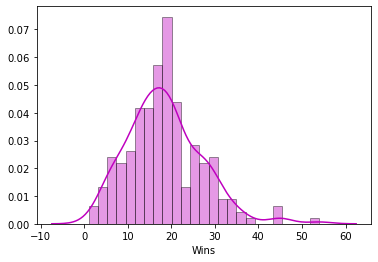

In [50]:
#distribution of wins among all athletes
#18 wins seems to be the average confirming our mean

x = df7['Wins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

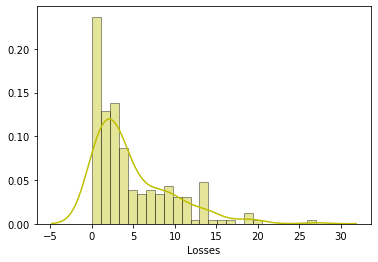

In [51]:
#distribution of losses
#Average being 2-3 losses

x = df7['Losses']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='y', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

# Now, We'll break up our master list in three sample groups: Former Champs, Current champs and Prospects (including newly drafted UFC athletes)

# The goal is to identify the trends and patterns among those samples 

In [52]:
#EDA- examine the current title holders with duplicated names showing either the ones who used to be Interim Champs or won the belt twice'

Belt_holders = df7[df7['Title Holder'] == 'Current']
Belt_holders

,First Name,Last Name,Weight Class,Wins,Losses,Total_Fights,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,...,Perc_Win_Dec,Perc_Loss_KO,Perc_Loss_Sub,Perc_Loss_Dec,Fighting Style,Sex,Country,Nickname,Title Holder,Interim Title Holder
23,Stipe,Miocic,Heavyweight,20,3,23,15,0,5,2,...,25.00,66.67,0.0,33.33,Wresling,Male,USA,Unknown,Current,NaN
25,Stipe,Miocic,Heavyweight,20,3,23,15,0,5,2,...,25.00,66.67,0.0,33.33,Wresling,Male,USA,Unknown,Current,NaN
42,Jan,Blachowicz,Light Heavyweight,27,8,35,8,9,10,2,...,37.04,25.00,12.5,62.50,Jiu-Jitsu,Male,Poland,Prince of Cieszyn,Current,NaN
54,Israel,Adesanya,Middleweight,20,0,20,15,0,5,0,...,25.00,NaN,NaN,NaN,"Kickboxing, Boxing",Male,Nigeria,The Last Stylebender,Current,interim
55,Israel,Adesanya,Middleweight,20,0,20,15,0,5,0,...,25.00,NaN,NaN,NaN,"Kickboxing, Boxing",Male,NaN,The Last Stylebender,Current,NaN
70,Kamaru,Usman,Welterweight,17,1,18,7,1,9,0,...,52.94,0.00,100.0,0.00,Wrestling,Male,Nigeria,The Nigerian Nightmare,Current,NaN
81,Khabib,Nurmagomedov,Lightweight,29,0,29,8,11,10,0,...,34.48,NaN,NaN,NaN,Sambo,Male,Russia,The Eagle,Current,NaN
84,Khabib,Nurmagomedov,Lightweight,29,0,29,8,11,10,0,...,34.48,NaN,NaN,NaN,Sambo,Male,Russia,The Eagle,Current,NaN
92,Alexander,Volkanovski,Featherweight,22,1,23,11,3,8,1,...,36.36,100.00,0.0,0.00,Jiu-Jitsu,Male,Australia,The Great,Current,NaN
101,Petr,Yan,Bantamweight,15,1,16,7,1,7,0,...,46.67,0.00,0.0,100.00,"Boxing, Muay thai",Male,Russia,No Mercy,Current,NaN


In [53]:
#We notice some duplicated rows meaning that the fighter either won the belt twice (such as Stipe, Israel & Khabib)
#or the fighter is a champion in two divisions (like Amanda who holds the belt in both Featherweight and Bantamweight)

Belt_holders['Title Holder'].value_counts

<bound method IndexOpsMixin.value_counts of 23     Current
25     Current
42     Current
54     Current
55     Current
70     Current
81     Current
84     Current
92     Current
101    Current
104    Current
107    Current
111    Current
113    Current
118    Current
Name: Title Holder, dtype: object>

In [54]:
#Now drop all duplicates

Belt_holders.drop([25,55,84,111])

,First Name,Last Name,Weight Class,Wins,Losses,Total_Fights,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,...,Perc_Win_Dec,Perc_Loss_KO,Perc_Loss_Sub,Perc_Loss_Dec,Fighting Style,Sex,Country,Nickname,Title Holder,Interim Title Holder
23,Stipe,Miocic,Heavyweight,20,3,23,15,0,5,2,...,25.00,66.67,0.0,33.33,Wresling,Male,USA,Unknown,Current,NaN
42,Jan,Blachowicz,Light Heavyweight,27,8,35,8,9,10,2,...,37.04,25.00,12.5,62.50,Jiu-Jitsu,Male,Poland,Prince of Cieszyn,Current,NaN
54,Israel,Adesanya,Middleweight,20,0,20,15,0,5,0,...,25.00,NaN,NaN,NaN,"Kickboxing, Boxing",Male,Nigeria,The Last Stylebender,Current,interim
70,Kamaru,Usman,Welterweight,17,1,18,7,1,9,0,...,52.94,0.00,100.0,0.00,Wrestling,Male,Nigeria,The Nigerian Nightmare,Current,NaN
81,Khabib,Nurmagomedov,Lightweight,29,0,29,8,11,10,0,...,34.48,NaN,NaN,NaN,Sambo,Male,Russia,The Eagle,Current,NaN
92,Alexander,Volkanovski,Featherweight,22,1,23,11,3,8,1,...,36.36,100.00,0.0,0.00,Jiu-Jitsu,Male,Australia,The Great,Current,NaN
101,Petr,Yan,Bantamweight,15,1,16,7,1,7,0,...,46.67,0.00,0.0,100.00,"Boxing, Muay thai",Male,Russia,No Mercy,Current,NaN
104,Deiveson,Figueiredo,Flyweight,20,1,21,9,8,3,0,...,15.00,0.00,0.0,100.00,Jiu-Jitsu,Male,Brazil,Daico,Current,NaN
107,Amanda,Nunes,Featherweight,20,4,24,13,3,4,2,...,20.00,50.00,25.0,25.00,Jiu-Jitsu,Female,Brazil,The Lioness,Current,NaN
113,Valentina,Shevchenko,Flyweight,20,3,23,6,7,7,1,...,35.00,33.33,0.0,66.67,"Muay thai, Taekwondo",Female,Kyrgyzstan,Bullet,Current,NaN


In [55]:
Belt_holders.describe(include=[np.number])

,Wins,Losses,Total_Fights,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision,Perc_Win,Perc_Loss,Perc_Win_KO,Perc_Win_Sub,Perc_Win_Dec,Perc_Loss_KO,Perc_Loss_Sub,Perc_Loss_Dec
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,11.000000,11.000000,11.000000
mean,21.333333,2.000000,23.333333,10.666667,4.266667,6.400000,0.800000,0.266667,0.933333,91.947333,8.052667,51.685333,18.247333,30.068000,35.606364,14.772727,49.620909
std,3.994043,2.203893,4.730851,3.373567,4.148436,2.472708,0.941124,0.457738,1.279881,7.309775,7.309775,18.605478,16.135106,10.704197,34.175609,30.009468,38.390540
min,15.000000,0.000000,16.000000,6.000000,0.000000,3.000000,0.000000,0.000000,0.000000,77.140000,0.000000,27.590000,0.000000,15.000000,0.000000,0.000000,0.000000
25%,20.000000,0.500000,20.500000,8.000000,0.500000,4.500000,0.000000,0.000000,0.000000,86.960000,2.175000,35.590000,2.940000,22.500000,0.000000,0.000000,25.000000
50%,20.000000,1.000000,23.000000,10.000000,3.000000,5.000000,0.000000,0.000000,1.000000,94.440000,5.560000,47.620000,15.000000,25.000000,33.330000,0.000000,33.330000
75%,21.500000,3.000000,24.000000,14.000000,7.500000,8.500000,2.000000,0.500000,1.000000,97.825000,13.040000,70.000000,34.165000,35.680000,58.335000,18.750000,83.335000
max,29.000000,8.000000,35.000000,15.000000,11.000000,10.000000,2.000000,1.000000,5.000000,100.000000,22.860000,75.000000,40.000000,52.940000,100.000000,100.000000,100.000000


([<matplotlib.axis.XTick at 0x25a308275b0>], [Text(0, 0, 'Belt_holders')])

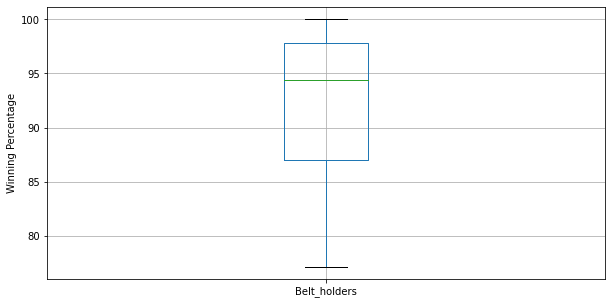

In [56]:
# Lets' Explore the %win among current champs (They have an average of 91.53%)

rcParams['figure.figsize'] = 10,5

Belt_holders.boxplot(column='Perc_Win')
plt.grid(True, axis='y')
plt.ylabel('Winning Percentage')
plt.xticks([1], ['Belt_holders'])

([<matplotlib.axis.XTick at 0x25a30881fa0>], [Text(0, 0, 'Belt_holders')])

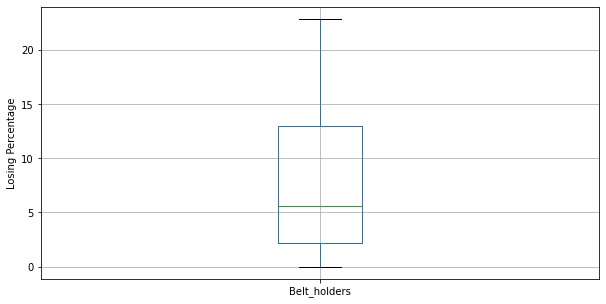

In [57]:
rcParams['figure.figsize'] = 10,5

Belt_holders.boxplot(column='Perc_Loss')
plt.grid(True, axis='y')
plt.ylabel('Losing Percentage')
plt.xticks([1], ['Belt_holders'])

Text(0.5, 0.98, '')

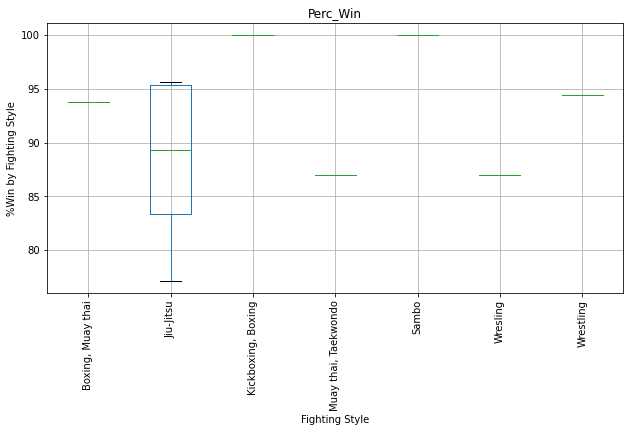

In [58]:
Belt_holders.boxplot(column = 'Perc_Win', by='Fighting Style')
plt.xticks(rotation=90)
plt.ylabel('%Win by Fighting Style')
plt.suptitle("")

In [59]:
Belt_holders.groupby('Fighting Style')['First Name'].count().sort_values(ascending=False)

Fighting Style
Jiu-Jitsu               6
Wresling                2
Sambo                   2
Kickboxing, Boxing      2
Wrestling               1
Muay thai, Taekwondo    1
Boxing, Muay thai       1
Name: First Name, dtype: int64

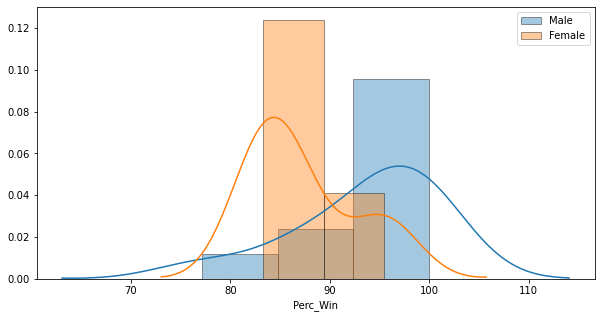

In [60]:
#Performance difference between Males and females champs

#Overall, Female Champions perform better than their male counterparts but they have fewer bouts.

m_fighters = Belt_holders.loc[Belt_holders['Sex']=='Male']['Perc_Win']
f_fighters = Belt_holders.loc[Belt_holders['Sex']=='Female']['Perc_Win']

rcParams['figure.figsize'] = 10,5
sns.distplot(m_fighters, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
sns.distplot(f_fighters, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
plt.legend()

In [61]:
gender_stats = Belt_holders.groupby("Sex", as_index=True).describe()
print(gender_stats)

        Wins                                                     Losses  \
       count       mean       std   min   25%   50%    75%   max  count   
Sex                                                                       
Female   4.0  20.250000  0.500000  20.0  20.0  20.0  20.25  21.0    4.0   
Male    11.0  21.727273  4.649536  15.0  20.0  20.0  24.50  29.0   11.0   

                  ... Perc_Loss_Sub        Perc_Loss_Dec             \
            mean  ...           75%    max         count       mean   
Sex               ...                                                 
Female  3.000000  ...         25.00   25.0           4.0  54.167500   
Male    1.636364  ...          6.25  100.0           7.0  47.022857   

                                                         
              std   min     25%     50%      75%    max  
Sex                                                      
Female  36.324540  25.0  25.000  45.835  75.0025  100.0  
Male    42.130718   0.0  16.665  33.

# Let's determine the "success ratio" - which is cross calculation of W/L
# It tells how likely a fighter will be successful in his future bouts

In [62]:
df7['success_ratio'] = df7['Wins'] / df7['Losses']
df7.head(3)

<ipython-input-62-11e8ea6b335c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['success_ratio'] = df7['Wins'] / df7['Losses']


,First Name,Last Name,Weight Class,Wins,Losses,Total_Fights,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,...,Perc_Loss_KO,Perc_Loss_Sub,Perc_Loss_Dec,Fighting Style,Sex,Country,Nickname,Title Holder,Interim Title Holder,success_ratio
0,Mark,Coleman,Heavyweight,16,10,26,7,5,4,3,...,30.00,50.00,20.00,Wrestling,Male,USA,The Hammer,Former,NaN,1.600000
1,Maurice,Smith,Heavyweight,14,14,28,8,3,3,0,...,0.00,57.14,42.86,Kickboxing,Male,USA,Mo,Former,NaN,1.000000
2,Randy,Couture,Heavyweight,19,11,30,7,4,8,7,...,63.64,27.27,9.09,Wrestling,Male,USA,The Natural,Former,NaN,1.727273


In [63]:
#Let's visualize the winning percentage of a double champ '2x champ' compare to 1X champ

twoX_champ_df = Belt_holders[Belt_holders['Last Name'] == 'Nunes']
twoX_champ_df

,First Name,Last Name,Weight Class,Wins,Losses,Total_Fights,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,...,Perc_Win_Dec,Perc_Loss_KO,Perc_Loss_Sub,Perc_Loss_Dec,Fighting Style,Sex,Country,Nickname,Title Holder,Interim Title Holder
107,Amanda,Nunes,Featherweight,20,4,24,13,3,4,2,...,20.0,50.0,25.0,25.0,Jiu-Jitsu,Female,Brazil,The Lioness,Current,NaN
111,Amanda,Nunes,Bantamweight,20,4,24,13,3,4,2,...,20.0,50.0,25.0,25.0,Jiu-Jitsu,Female,Brazil,The Lioness,Current,NaN


In [64]:
# Drill down to the prospects

Prospects = df7[df7['Title Holder'] == 'Prospect']
Prospects

,First Name,Last Name,Weight Class,Wins,Losses,Total_Fights,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,...,Perc_Loss_KO,Perc_Loss_Sub,Perc_Loss_Dec,Fighting Style,Sex,Country,Nickname,Title Holder,Interim Title Holder,success_ratio
119,Vadim,Nemkov,Light Heavyweight,12,2,14,9,2,1,1,...,50.00,0.00,50.00,Wrestling,Male,Russia,Unknown,Prospect,NaN,6.000000
120,Lance,Palmer,Featherweight,22,3,25,1,8,13,0,...,0.00,33.33,66.67,Wrestling,Male,USA,The Party,Prospect,NaN,7.333333
121,A.J.,McKee,Featherweight,17,0,17,6,6,5,0,...,NaN,NaN,NaN,Wrestling,Male,USA,Mercenary,Prospect,NaN,inf
122,Natan,Schulte,Lightweight,20,3,23,4,9,7,1,...,33.33,33.33,33.33,Jiu-Jitsu,Male,Brazil,Russo,Prospect,NaN,6.666667
123,Darrion,Caldwell,Featherweight,15,4,19,2,6,7,0,...,0.00,75.00,25.00,Wrestling,Male,USA,The Wolf,Prospect,NaN,3.750000
124,Jiri,Prochazka,Light Heavyweight,27,3,30,24,2,1,2,...,66.67,33.33,0.00,Boxing,Male,Czech republic,Denisa,Prospect,NaN,9.000000
125,Valentin,Moldavsky,Heavyweight,10,1,11,1,3,6,0,...,0.00,0.00,100.00,"Sambo, MMA",Male,Russia,Unknown,Prospect,NaN,10.000000
126,Abdul-Aziz,Abdulvakhabov,Lightweight,18,2,20,7,6,5,0,...,0.00,0.00,100.00,Wrestling,Male,Russia,Lion,Prospect,NaN,9.000000
127,Tomasz,Narkun,Light Heavyweight,18,3,21,3,14,1,1,...,33.33,0.00,66.67,Jiu-Jitsu,Male,Poland,Giraffe,Prospect,NaN,6.000000
128,Pedro,Carvalho,Featherweight,11,4,15,2,6,3,1,...,25.00,25.00,50.00,Jiu-Jitsu,Male,Portugal,The Game,Prospect,NaN,2.750000


In [65]:
Prospects.describe(include=[np.number])

,Wins,Losses,Total_Fights,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision,Perc_Win,Perc_Loss,Perc_Win_KO,Perc_Win_Sub,Perc_Win_Dec,Perc_Loss_KO,Perc_Loss_Sub,Perc_Loss_Dec,success_ratio
count,50.0000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,44.000000,44.000000,44.000000,50.000
mean,15.8600,2.040000,17.900000,6.140000,4.580000,5.140000,0.500000,0.400000,1.140000,88.699400,11.300600,38.323800,29.236800,32.438800,25.567727,17.613182,56.818636,inf
std,4.4217,1.194545,4.743416,4.365963,3.207708,3.516782,0.646813,0.606092,0.833238,6.648373,6.648373,22.733171,20.490024,19.443728,33.737869,24.655991,33.443711,NaN
min,9.0000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.750
25%,13.0000,1.000000,15.000000,3.000000,2.000000,3.000000,0.000000,0.000000,0.250000,85.177500,7.480000,17.047500,12.947500,20.875000,0.000000,0.000000,33.330000,5.750
50%,15.0000,2.000000,17.500000,6.000000,4.000000,5.000000,0.000000,0.000000,1.000000,89.470000,10.530000,37.445000,28.570000,29.410000,0.000000,0.000000,58.335000,8.500
75%,18.0000,3.000000,20.000000,8.000000,6.000000,6.000000,1.000000,1.000000,2.000000,92.520000,14.822500,53.850000,40.000000,42.440000,33.330000,33.330000,81.250000,12.375
max,29.0000,4.000000,32.000000,24.000000,14.000000,16.000000,2.000000,3.000000,3.000000,100.000000,26.670000,88.890000,90.000000,91.670000,100.000000,100.000000,100.000000,inf


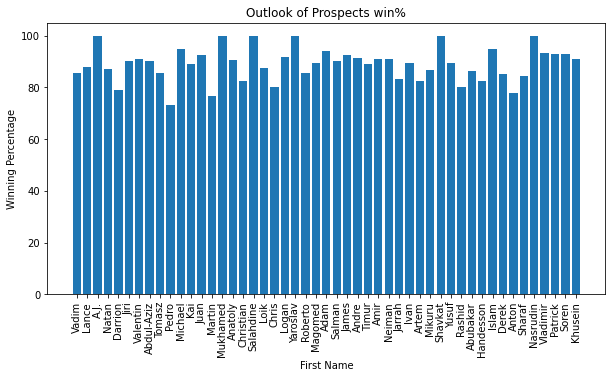

In [66]:
plt.bar(Prospects['First Name'], Prospects['Perc_Win'])
plt.xlabel('First Name')
plt.xticks(rotation=90)
plt.ylabel('Winning Percentage')
plt.title('Outlook of Prospects win%')

plt.show()

Text(0.5, 0.98, '')

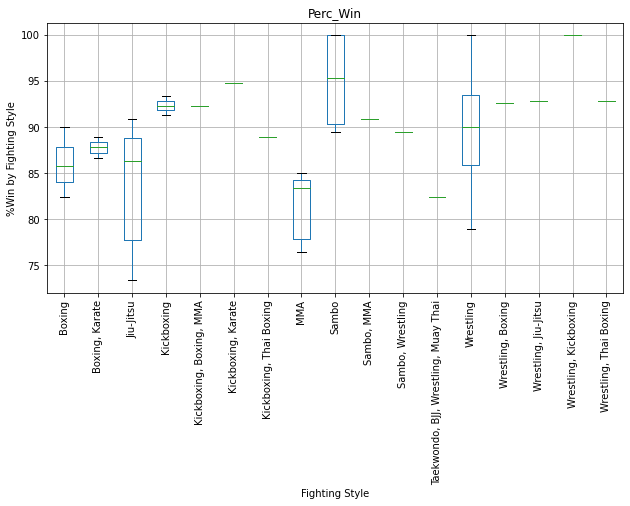

In [67]:
Prospects.boxplot(column = 'Perc_Win', by='Fighting Style')
plt.xticks(rotation=90)
plt.ylabel('%Win by Fighting Style')
plt.suptitle("")

In [68]:
Prospects.groupby('Fighting Style')['First Name'].count().sort_values(ascending=False)

Fighting Style
Wrestling                               18
Jiu-Jitsu                                6
MMA                                      5
Sambo                                    4
Boxing                                   3
Kickboxing                               2
Boxing, Karate                           2
Taekwondo, BJJ, Wrestling, Muay Thai     1
Sambo, Wrestling                         1
Sambo, MMA                               1
Wrestling, Kickboxing                    1
Wrestling, Boxing                        1
Kickboxing, Thai Boxing                  1
Kickboxing, Karate                       1
Kickboxing, Boxing, MMA                  1
Wrestling, Jiu-Jitsu                     1
Wrestling, Thai Boxing                   1
Name: First Name, dtype: int64

In [69]:
former_champs = df7[df7['Title Holder'] == 'Former']
former_champs

,First Name,Last Name,Weight Class,Wins,Losses,Total_Fights,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,...,Perc_Loss_KO,Perc_Loss_Sub,Perc_Loss_Dec,Fighting Style,Sex,Country,Nickname,Title Holder,Interim Title Holder,success_ratio
0,Mark,Coleman,Heavyweight,16,10,26,7,5,4,3,...,30.00,50.00,20.00,Wrestling,Male,USA,The Hammer,Former,NaN,1.600000
1,Maurice,Smith,Heavyweight,14,14,28,8,3,3,0,...,0.00,57.14,42.86,Kickboxing,Male,USA,Mo,Former,NaN,1.000000
2,Randy,Couture,Heavyweight,19,11,30,7,4,8,7,...,63.64,27.27,9.09,Wrestling,Male,USA,The Natural,Former,NaN,1.727273
3,Bas,Rutten,Heavyweight,28,4,32,12,13,3,0,...,0.00,75.00,25.00,"Kickboxing, Wrestling",Male,Netherlands,El Guapo (The Handsome One),Former,NaN,7.000000
4,Kevin,Randleman,Heavyweight,17,16,33,9,8,0,4,...,25.00,50.00,25.00,"Wrestling, Boxing",Male,USA,The Monster,Former,NaN,1.062500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Nicco,Montano,Flyweight,4,3,7,2,0,2,0,...,0.00,0.00,100.00,"Jiu-Jitsu, Boxing",Female,USA,Unknown,Former,NaN,1.333333
114,Carla,Esparza,Strawweight,17,6,23,3,4,10,2,...,33.33,16.67,50.00,"Wrestling, Jiu-Jitsu",Female,USA,Cookie Monster,Former,NaN,2.833333
115,Joanna,Jedrzejczyk,Strawweight,16,4,20,4,1,11,1,...,25.00,0.00,75.00,"Muay thai, Kickboxing",Female,Poland,Unknown,Former,NaN,4.000000
116,Rose,Namajunas,Strawweight,9,4,13,1,5,3,1,...,25.00,25.00,50.00,"Jiu-Jitsu, Karate, Taekwondo",Female,USA,Thug Rose,Former,NaN,2.250000


In [70]:
former_champs.drop([39,41,73,61,62,63,103])

,First Name,Last Name,Weight Class,Wins,Losses,Total_Fights,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,...,Perc_Loss_KO,Perc_Loss_Sub,Perc_Loss_Dec,Fighting Style,Sex,Country,Nickname,Title Holder,Interim Title Holder,success_ratio
0,Mark,Coleman,Heavyweight,16,10,26,7,5,4,3,...,30.00,50.00,20.00,Wrestling,Male,USA,The Hammer,Former,NaN,1.600000
1,Maurice,Smith,Heavyweight,14,14,28,8,3,3,0,...,0.00,57.14,42.86,Kickboxing,Male,USA,Mo,Former,NaN,1.000000
2,Randy,Couture,Heavyweight,19,11,30,7,4,8,7,...,63.64,27.27,9.09,Wrestling,Male,USA,The Natural,Former,NaN,1.727273
3,Bas,Rutten,Heavyweight,28,4,32,12,13,3,0,...,0.00,75.00,25.00,"Kickboxing, Wrestling",Male,Netherlands,El Guapo (The Handsome One),Former,NaN,7.000000
4,Kevin,Randleman,Heavyweight,17,16,33,9,8,0,4,...,25.00,50.00,25.00,"Wrestling, Boxing",Male,USA,The Monster,Former,NaN,1.062500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Nicco,Montano,Flyweight,4,3,7,2,0,2,0,...,0.00,0.00,100.00,"Jiu-Jitsu, Boxing",Female,USA,Unknown,Former,NaN,1.333333
114,Carla,Esparza,Strawweight,17,6,23,3,4,10,2,...,33.33,16.67,50.00,"Wrestling, Jiu-Jitsu",Female,USA,Cookie Monster,Former,NaN,2.833333
115,Joanna,Jedrzejczyk,Strawweight,16,4,20,4,1,11,1,...,25.00,0.00,75.00,"Muay thai, Kickboxing",Female,Poland,Unknown,Former,NaN,4.000000
116,Rose,Namajunas,Strawweight,9,4,13,1,5,3,1,...,25.00,25.00,50.00,"Jiu-Jitsu, Karate, Taekwondo",Female,USA,Thug Rose,Former,NaN,2.250000


Text(0.5, 0.98, '')

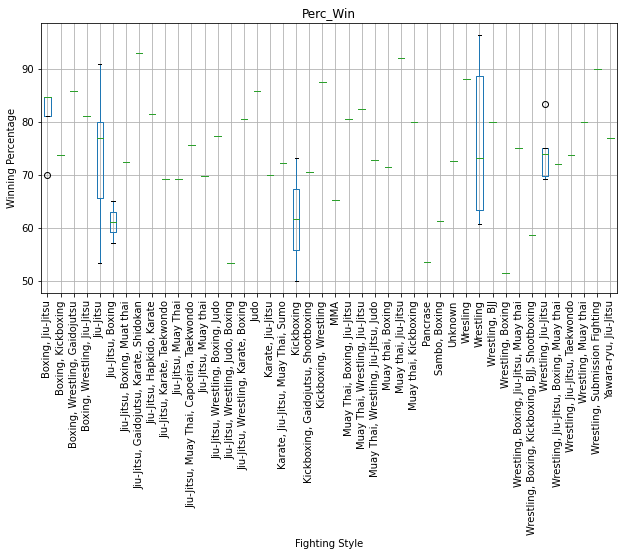

In [71]:
former_champs.boxplot(column = 'Perc_Win', by='Fighting Style')
plt.xticks(rotation=90)
plt.ylabel('Winning Percentage')
plt.suptitle("")

In [72]:
former_champs['Fighting Style'].unique()

array(['Wrestling', 'Kickboxing', 'Kickboxing, Wrestling',
       'Wrestling, Boxing', 'Jiu-Jitsu', 'Sambo, Boxing',
       'Jiu-Jitsu, Wrestling, Boxing, Judo',
       'Boxing, Wrestling, Gaidojutsu', 'Muay Thai, Wrestling, Jiu-Jitsu',
       'Boxing, Jiu-Jitsu', 'Muay Thai, Wrestling, Jiu-Jitsu, Judo',
       'Wresling', 'Pancrase', 'Jiu-Jitsu, Boxing', 'Karate, Jiu-Jitsu',
       'Karate, Jiu-Jitsu, Muay Thai, Sumo', 'Jiu-Jitsu, Muay Thai',
       'Unknown', 'Wrestling, BJJ', 'Muay Thai, Boxing, Jiu-Jitsu',
       'Jiu-Jitsu, Muay Thai, Capoeira, Taekwondo',
       'Wrestling, Jiu-Jitsu', 'Yawara-ryu, Jiu-Jitsu',
       'Jiu-Jitsu, Hapkido, Karate',
       'Jiu-Jitsu, Gaidojutsu, Karate, Shidokan',
       'Jiu-Jitsu, Wrestling, Karate, Boxing',
       'Jiu-Jitsu, Wrestling, Judo, Boxing',
       'Kickboxing, Gaidojutsu, Shootboxing', 'MMA',
       'Wrestling, Boxing, Kickboxing, BJJ, Shootboxing',
       'Wrestling, Submission Fighting',
       'Wrestling, Boxing, Jiu-Jitsu, Muay th

In [73]:
#Most recurrent fighting style among former champs 

former_champs.groupby('Fighting Style')['First Name'].count().sort_values(ascending=False)

Fighting Style
Wrestling                                          22
Jiu-Jitsu                                          22
Wrestling, Jiu-Jitsu                                5
Boxing, Jiu-Jitsu                                   4
Jiu-Jitsu, Gaidojutsu, Karate, Shidokan             4
Kickboxing                                          2
Muay Thai, Wrestling, Jiu-Jitsu                     2
Muay Thai, Wrestling, Jiu-Jitsu, Judo               2
Jiu-Jitsu, Hapkido, Karate                          2
Wresling                                            2
Sambo, Boxing                                       2
Jiu-Jitsu, Boxing                                   2
Wrestling, Muay thai                                2
Jiu-Jitsu, Boxing, Muat thai                        1
Karate, Jiu-Jitsu                                   1
Boxing, Wrestling, Jiu-Jitsu                        1
Jiu-Jitsu, Karate, Taekwondo                        1
Jiu-Jitsu, Muay Thai                                1
Jiu-Jitsu, Mu

In [74]:
#We need to associate the camps/coaches to their corresponding fighters
#Load Coaches' list

Camp = pd.read_csv('../data/Coaches_list.csv')
Camp

,Camp(in alphabetic order),Coaches,Current Fighters,Previous Fighters,Location
0,Alliance MMA,"Brandon Vera, Eric del Fierro","Dominick Cruz, Alexander Gustafsson, Phil Davi...",NaN,"San Diego, USA"
1,Allstars Training Center,"Andreas Michael, Alan do Nascimento","Alexander Gustafsson, Ilir Latifi, David Teymu...","Reza Madadi, Jimi Manuwa, Makwan Amirkhani, To...","Stockholm, Sweden"
2,AMC Pankration,Matt Hume,"Demetrious Johnson, Bibiano Fernandes, Caros F...","Josh Barnett, Rich Franklin, Jeff Monson, Tim ...","Kirkland, USA"
3,American Kickboxing Academy,"Javier Mendez, Bob CookLeandro Vieira","Cain Velasquez, Khabib Nurmagomedov, Islam Mak...","Daniel Cormier, B.J. Penn, Jon Fitch, Josh Kos...","San Jose, USA"
4,American Top Team,"Mike Brown, Steve Mocco, Marcus Silveira","Junior Dos Santos, Tyron Woodley, Thiago Alves...",Colby Covington,"Coconut Creek, USA"
5,Black Tiger Fight Club,"Vincent Soberano, Xuejun Cai, Pedro Jord","Zhang Weili, Li Jingliang, Yao Zhikui",NaN,"Beijing, China"
6,Busan Team M.A.D,Sung Hoon Yang,"Dong Hyun Kim, Seo Hee Ham, Doo Ho Choi",NaN,"Busan, South Korea"
7,Cesar Gracie Fight Team,Cesar Gracie,"Nick Diaz, Nate Diaz, Jake Shields, Gilbert Me...",NaN,"Pleasant Hill, USA"
8,City Kickboxing,Eugene Bareman,"Israel Adesanya, Alexander Volkanovski, Dan Ho...",NaN,"Auckland, New Zealand"
9,Elevation Fight Team,"Eliot Marshall, Christian Allen, Cody Donovan,...","Curtis Blaydes, Drew Dober, Alistair Overeem, ...","Brandon Thatch, T. J. Dillashaw, Matt Brown","Denver, USA"


In [75]:
# Who are all the current fighters associated with the different camps

Camp['Current Fighters'].head()

0    Dominick Cruz, Alexander Gustafsson, Phil Davi...
1    Alexander Gustafsson, Ilir Latifi, David Teymu...
2    Demetrious Johnson, Bibiano Fernandes, Caros F...
3    Cain Velasquez, Khabib Nurmagomedov, Islam Mak...
4    Junior Dos Santos, Tyron Woodley, Thiago Alves...
Name: Current Fighters, dtype: object

In [76]:
list_current = []
for item in Camp['Current Fighters']:
    try:
        list_current.extend(item.split(sep = ','))
    except:
        continue

In [77]:
list_current

['Dominick Cruz',
 ' Alexander Gustafsson',
 ' Phil Davis',
 ' Ross Pearson',
 ' Jeremy Stephens',
 ' Myles Jury',
 ' Wilson Reis',
 ' Jessica Penne',
 ' Bec Rawlings',
 ' Angela Hill',
 'Alexander Gustafsson',
 ' Ilir Latifi',
 ' David Teymur',
 ' Daniel Teymur',
 ' David Bielkheden',
 ' Niklas Backstrom',
 ' Nico Musoke',
 ' Khamzat Chimaev',
 'Demetrious Johnson',
 ' Bibiano Fernandes',
 ' Caros Fodor',
 ' James Yang',
 'Cain Velasquez',
 ' Khabib Nurmagomedov',
 ' Islam Makhachev',
 ' Alejandro Perez',
 ' Bethe Correia',
 'Junior Dos Santos',
 ' Tyron Woodley',
 ' Thiago Alves',
 ' Gleison Tibau',
 ' Antonio "Bigfoot" Silva',
 ' Brad Pickett',
 ' Muhammed "King Mo" Lawal',
 ' Will Brooks',
 ' Marc Diakiese',
 ' Dustin Poirier',
 ' Charles Rosa',
 ' Jorge Masvidal',
 ' Yoel Romero',
 ' Santiago Ponzinibbio',
 ' Thiago Santos',
 ' Antonio Carlos Jr ',
 ' Marcos Rogerio de Lima',
 ' Aleksei Oleinik',
 ' Rashid Magomedov',
 ' Douglas Lima',
 ' Dhiego Lima',
 ' Omari Akhmedov',
 ' Sulta

In [78]:
len(list_current)

285

In [79]:
# look at the previous fighters as well
# Who are all the previous fighters associated with the different camps

Camp['Previous Fighters'].head()

0                                                  NaN
1    Reza Madadi, Jimi Manuwa, Makwan Amirkhani, To...
2    Josh Barnett, Rich Franklin, Jeff Monson, Tim ...
3    Daniel Cormier, B.J. Penn, Jon Fitch, Josh Kos...
4                                      Colby Covington
Name: Previous Fighters, dtype: object

In [80]:
list_previous = []
for item in Camp['Previous Fighters']:
    try:
        list_previous.extend(item.split(sep = ','))
    except:
        continue

In [81]:
list_previous

['Reza Madadi',
 ' Jimi Manuwa',
 ' Makwan Amirkhani',
 ' Tor Troeng',
 'Josh Barnett',
 ' Rich Franklin',
 ' Jeff Monson',
 ' Tim Boetsch',
 ' Chris Leben',
 ' Matt Brown',
 ' Hayato Sakurai',
 'Daniel Cormier',
 ' B.J. Penn',
 ' Jon Fitch',
 ' Josh Koscheck',
 ' Mike Swick',
 ' Luke Rockhold',
 ' Leon Edwards',
 'Colby Covington',
 'Brandon Thatch',
 ' T. J. Dillashaw',
 ' Matt Brown',
 'Georges St-Pierre',
 ' Rashad Evans',
 ' Tim Kennedy',
 ' Donald Cerrone',
 ' Derek Brunson',
 'Rafael dos Anjos',
 'Lee Murray',
 ' Marius Zaromskis',
 ' James Thompson',
 ' Mostapha al-Turk',
 ' Alex Reid',
 'Claudia Gadelha',
 'Alex Caceres',
 ' Bryan Barberena',
 ' Jamie Varner',
 ' Rick Story',
 'Xiong Jingnan',
 ' Cris Cyborg',
 ' Luke Jumeau',
 ' Anthony Leone',
 ' Krzysztof Jotko',
 'Ben Askren',
 ' Dustin Ortiz',
 ' Ben Rothwell',
 ' Alan Belcher',
 ' Pat Barry',
 ' Matt Mitrione',
 ' Jens Pulver',
 ' Pascal Krauss',
 ' Rose Namajunas',
 ' Sage Northcutt',
 'Alistair Overeem',
 ' Sean Sorian

In [82]:
#Based on these two list, let's create a new column with only one champion associated with the different camps 
#and we'll merge it with our master athletes' list
#Clean up our df first

In [83]:
Camp = Camp.drop(['Coaches','Location','Previous Fighters'], axis=1)
Camp

,Camp(in alphabetic order),Current Fighters
0,Alliance MMA,"Dominick Cruz, Alexander Gustafsson, Phil Davi..."
1,Allstars Training Center,"Alexander Gustafsson, Ilir Latifi, David Teymu..."
2,AMC Pankration,"Demetrious Johnson, Bibiano Fernandes, Caros F..."
3,American Kickboxing Academy,"Cain Velasquez, Khabib Nurmagomedov, Islam Mak..."
4,American Top Team,"Junior Dos Santos, Tyron Woodley, Thiago Alves..."
5,Black Tiger Fight Club,"Zhang Weili, Li Jingliang, Yao Zhikui"
6,Busan Team M.A.D,"Dong Hyun Kim, Seo Hee Ham, Doo Ho Choi"
7,Cesar Gracie Fight Team,"Nick Diaz, Nate Diaz, Jake Shields, Gilbert Me..."
8,City Kickboxing,"Israel Adesanya, Alexander Volkanovski, Dan Ho..."
9,Elevation Fight Team,"Curtis Blaydes, Drew Dober, Alistair Overeem, ..."


In [84]:
#Print/Modify and reload
Camp.to_csv('../data/Camp.csv')

In [85]:
Camp = pd.read_csv('../data/Camps.csv')

#Let's merge our camps list with our master's list and save it!

In [86]:
together = (df7,Camp)
df0 = pd.concat(together, ignore_index = True)
df0

,First Name,Last Name,Weight Class,Wins,Losses,Total_Fights,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,...,Perc_Loss_Sub,Perc_Loss_Dec,Fighting Style,Sex,Country,Nickname,Title Holder,Interim Title Holder,success_ratio,Teams
0,Mark,Coleman,Heavyweight,16.0,10.0,26.0,7.0,5.0,4.0,3.0,...,50.00,20.00,Wrestling,Male,USA,The Hammer,Former,NaN,1.600000,NaN
1,Maurice,Smith,Heavyweight,14.0,14.0,28.0,8.0,3.0,3.0,0.0,...,57.14,42.86,Kickboxing,Male,USA,Mo,Former,NaN,1.000000,NaN
2,Randy,Couture,Heavyweight,19.0,11.0,30.0,7.0,4.0,8.0,7.0,...,27.27,9.09,Wrestling,Male,USA,The Natural,Former,NaN,1.727273,NaN
3,Bas,Rutten,Heavyweight,28.0,4.0,32.0,12.0,13.0,3.0,0.0,...,75.00,25.00,"Kickboxing, Wrestling",Male,Netherlands,El Guapo (The Handsome One),Former,NaN,7.000000,NaN
4,Kevin,Randleman,Heavyweight,17.0,16.0,33.0,9.0,8.0,0.0,4.0,...,50.00,25.00,"Wrestling, Boxing",Male,USA,The Monster,Former,NaN,1.062500,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,Petr,Yan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tiger Muay Thai
222,Deiveson,Figueiredo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Team Figueiredo
223,Amanda,Nunes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American Top Team
224,Valentina,Shevchenko,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tiger Muay Thai


In [87]:
df0.to_csv('../data/All_fighters.csv')

In [100]:
#Count the teams with more than one champion

Power_house = df0.groupby(['Teams']).agg(['count'])
Power_house = Power_house.drop(['Last Name','Weight Class','Wins','Losses','Total_Fights','win_by_KO_TKO','win_by_submission','win_by_decision','loss_by_KO_TKO','loss_by_submission','loss_by_decision','Perc_Win','Perc_Loss','Perc_Win_KO','Perc_Win_Sub','Perc_Win_Dec','Perc_Loss_KO','Perc_Loss_Sub','Perc_Loss_Dec','Fighting Style','Sex','Country','Nickname','Title Holder','Interim Title Holder','success_ratio'], axis=1)
Power_house


,First Name
,count
Teams,
American Kickboxing Academy,1
American Top Team,1
Black Tiger Fight Club,1
City Kickboxing,2
Sanford MMA (formerly the Blackzilians),1
Strong Style Fight Team,1
Team Figueiredo,1
Tiger Muay Thai,2
